In [1]:
import md
import numpy as np
import time
import random
import matplotlib as matplotlib
import matplotlib.pyplot as plt

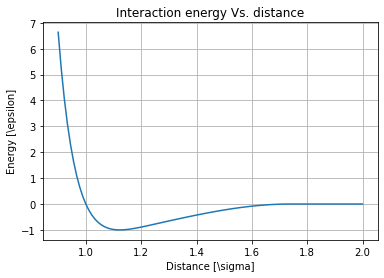

In [2]:
x = np.linspace(0.9, 2., 100)
plt.plot(x, [md.interaction.potential(xx) for xx in x])
plt.xlabel("Distance [\sigma]")
plt.ylabel("Energy [\epsilon]")
plt.title("Interaction energy Vs. distance")
plt.grid()
plt.show()

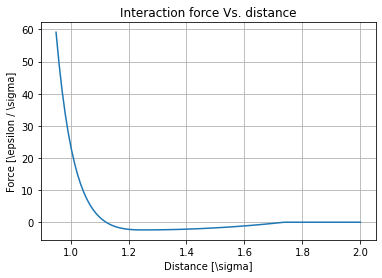

In [3]:
x = np.linspace(0.95, 2., 100)
plt.plot(x, [md.interaction.force_magnitude(xx) for xx in x])
plt.xlabel("Distance [\sigma]")
plt.ylabel("Force [\epsilon / \sigma]")
plt.title("Interaction force Vs. distance")
plt.grid()
plt.show()

In [4]:
def plot(gas):
    assert isinstance(gas, md.Ensemble)
    x = [particle.position[0] for particle in gas.particles]
    y = [particle.position[1] for particle in gas.particles]
    plt.scatter(x, y)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([0, gas.L])
    plt.ylim([0, gas.L])
    plt.title(f"N={gas.N}, rho={gas.rho}, L={gas.L:.3f}")
    plt.show()

# Dimensional parameters

In [5]:
m       = 8.3e-23  # g
sigma   = 2e-8     # cm
epsilon = 6.9e-13  # erg
k_B     = 1.38e-16 # erg/K

# Derived units

In [6]:
units = {
    "length"      : sigma,
    "energy"      : epsilon,
    "mass"        : m,
    "time"        : sigma * (m/epsilon)**0.5,
    "pressure"    : epsilon / sigma**3,
    "density"     : m / sigma**3,
    "temperature" : epsilon / k_B
}

# 1.

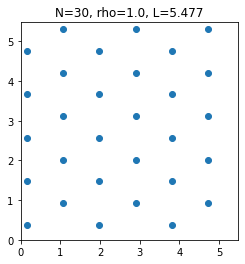

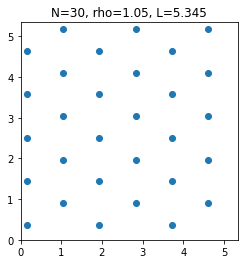

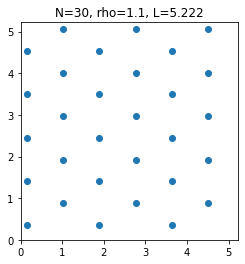

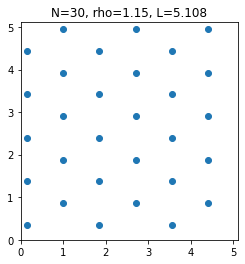

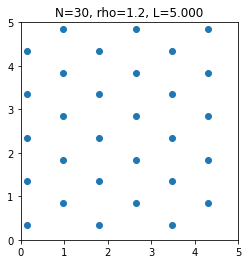

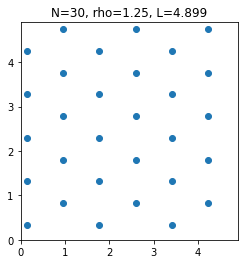

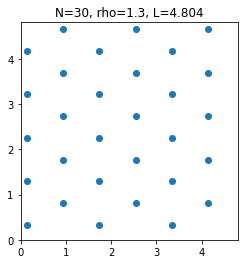

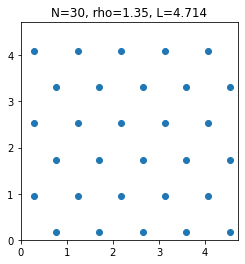

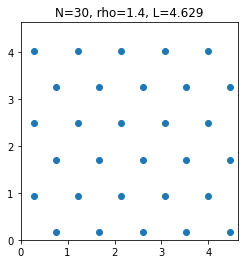

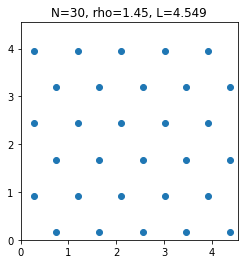

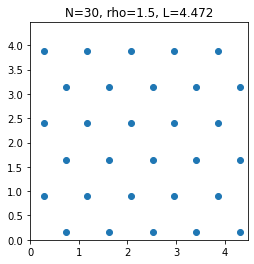

In [7]:
rhos = np.linspace(1., 1.5, 11)
N = 30
dt = 1e-3 

pressure = np.zeros(len(rhos))
energies = np.zeros(len(rhos))

for i, rho in enumerate(rhos):
    gas = md.Ensemble(N=N, rho=rho, dt=dt, seed=0)
    gas.relaxate()
    plot(gas)
    
    p = gas.pressure()
    pressure[i] = gas.pressure()
    eps_pressure = p * 1e-2
    
    while abs(pressure[i]-p)>eps_pressure:
        p = pressure[i]
        pressure[i] = gas.pressure()

    energies[i] = gas.total_energy()

equilibrium_energy_section_2 = energies[np.where(rhos == 1.1)][0]

We see that the particles relaxate towards a hexagonal lattice.

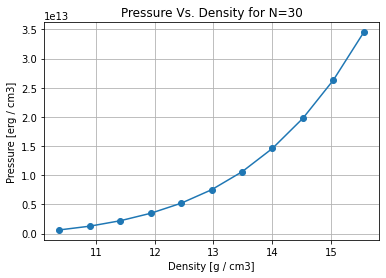

In [8]:
plt.plot(rhos * units["density"], pressure * units["pressure"], '-o')
plt.title(f"Pressure Vs. Density for N={N}")
plt.xlabel("Density [g / cm3]")
plt.ylabel("Pressure [erg / cm3]")
plt.grid()
plt.show()

We see that the pressure grows super-linearly with the density. This makes sense, since the interaction energy diverges at 0.

In [9]:
print("")
print('%12s %12s %12s ' % ('rho','pressure','energy'))
print('%12s %12s %12s ' % ('[g/cm3]','[erg/cm3]','[erg]'))
for i in range(len(rhos)):
    print(f"{rhos[i]*units['density']:12.4e} {pressure[i]*units['pressure']:12.4e} {energies[i]*units['energy']:12.4e}")


         rho     pressure       energy 
     [g/cm3]    [erg/cm3]        [erg] 
  1.0375e+01   6.2597e+11  -5.5799e-11
  1.0894e+01   1.2680e+12  -4.5275e-11
  1.1412e+01   2.1992e+12  -2.7623e-11
  1.1931e+01   3.4788e+12  -1.1067e-12
  1.2450e+01   5.2032e+12   3.6207e-11
  1.2969e+01   7.5150e+12   8.6498e-11
  1.3487e+01   1.0590e+13   1.5268e-10
  1.4006e+01   1.4604e+13   2.3805e-10
  1.4525e+01   1.9762e+13   3.4628e-10
  1.5044e+01   2.6305e+13   4.8147e-10
  1.5562e+01   3.4510e+13   6.4814e-10


In [10]:
print("Normalized units:")
print('%12s %12s %12s ' % ('rho','pressure','energy'))
for i in range(len(rhos)):
    print(f"{rhos[i]:12.4e} {pressure[i]:12.4e} {energies[i]:12.4e}")

Normalized units:
         rho     pressure       energy 
  1.0000e+00   7.2576e+00  -8.0868e+01
  1.0500e+00   1.4702e+01  -6.5616e+01
  1.1000e+00   2.5498e+01  -4.0034e+01
  1.1500e+00   4.0334e+01  -1.6039e+00
  1.2000e+00   6.0327e+01   5.2474e+01
  1.2500e+00   8.7131e+01   1.2536e+02
  1.3000e+00   1.2278e+02   2.2127e+02
  1.3500e+00   1.6932e+02   3.4500e+02
  1.4000e+00   2.2912e+02   5.0186e+02
  1.4500e+00   3.0498e+02   6.9778e+02
  1.5000e+00   4.0012e+02   9.3934e+02


# 2.

In [11]:
rho = 1.1
N = 30
dt = 1e-3 

total_energies   = np.array([*np.linspace(equilibrium_energy_section_2, 10, 50, endpoint=False), *np.geomspace(10, 100, 10)])
kinetic_energies = total_energies - equilibrium_energy_section_2
print(kinetic_energies)

[  0.           1.00067939   2.00135878   3.00203817   4.00271756
   5.00339695   6.00407634   7.00475573   8.00543512   9.00611451
  10.0067939   11.00747329  12.00815268  13.00883207  14.00951146
  15.01019085  16.01087024  17.01154963  18.01222901  19.0129084
  20.01358779  21.01426718  22.01494657  23.01562596  24.01630535
  25.01698474  26.01766413  27.01834352  28.01902291  29.0197023
  30.02038169  31.02106108  32.02174047  33.02241986  34.02309925
  35.02377864  36.02445803  37.02513742  38.02581681  39.0264962
  40.02717559  41.02785498  42.02853437  43.02921376  44.02989315
  45.03057254  46.03125193  47.03193132  48.03261071  49.0332901
  50.03396949  52.94946614  56.71497486  61.57831639  67.85956351
  75.97210612  86.44985782  99.98239452 117.46033775 140.03396949]


In [12]:
pressure    = np.zeros(len(kinetic_energies))
temperature = np.zeros(len(kinetic_energies))

for i, kinetic_energy in enumerate(kinetic_energies):
    print(i)
    gas = md.Ensemble(N=N, rho=rho, dt=dt, seed=0)
    gas.relaxate()
    gas.random_velocities(kinetic_energy=kinetic_energy, seed=0)

    # thermalize
    gas.step(steps=100000)

    p = gas.pressure()
    t = gas.temperature() 

    eps_temperature = t*1e-2
    eps_pressure = p*1e-2

    pressure[i] = gas.pressure()
    temperature[i] = gas.temperature()

    while (abs(temperature[i]-t)>eps_temperature or abs(pressure[i]-p)>eps_pressure):
        t = temperature[i]
        p = pressure[i]

        pressure[i] = gas.pressure()
        temperature[i] = gas.temperature()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


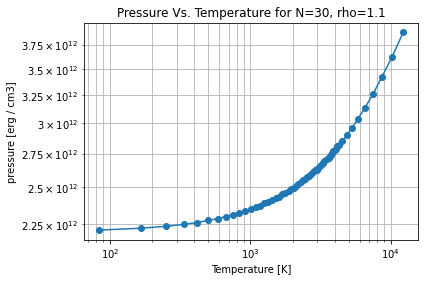

In [13]:
plt.loglog((temperature * units["temperature"])[1:], (pressure * units["pressure"])[1:], '-o')
plt.title(f"Pressure Vs. Temperature for N={N}, rho={rho}")
plt.ylabel("pressure [erg / cm3]")
plt.xlabel("Temperature [K]")
plt.grid(which="both")
plt.show()

In [14]:
print("")
print('%12s %12s %12s ' % ('temperature','pressure','energy'))
print('%12s %12s %12s ' % ('[K]','[erg/cm3]','[erg]'))
for i in range(len(temperature)):
    print(f"{temperature[i]*units['temperature']:12.4e} {pressure[i]*units['pressure']:12.4e} {total_energies[i]*units['energy']:12.4e}")


 temperature     pressure       energy 
         [K]    [erg/cm3]        [erg] 
  1.4405e-05   2.1992e+12  -2.7623e-11
  8.3458e+01   2.2111e+12  -2.6933e-11
  1.6674e+02   2.2231e+12  -2.6243e-11
  2.5099e+02   2.2355e+12  -2.5552e-11
  3.3559e+02   2.2474e+12  -2.4862e-11
  4.1641e+02   2.2596e+12  -2.4171e-11
  5.0073e+02   2.2730e+12  -2.3481e-11
  5.8652e+02   2.2850e+12  -2.2790e-11
  6.7260e+02   2.2979e+12  -2.2100e-11
  7.5021e+02   2.3083e+12  -2.1409e-11
  8.3108e+02   2.3220e+12  -2.0719e-11
  9.1855e+02   2.3349e+12  -2.0028e-11
  1.0039e+03   2.3463e+12  -1.9338e-11
  1.0958e+03   2.3590e+12  -1.8647e-11
  1.1623e+03   2.3715e+12  -1.7957e-11
  1.2581e+03   2.3870e+12  -1.7266e-11
  1.3436e+03   2.3961e+12  -1.6576e-11
  1.4357e+03   2.4119e+12  -1.5885e-11
  1.5118e+03   2.4237e+12  -1.5195e-11
  1.5961e+03   2.4320e+12  -1.4505e-11
  1.6903e+03   2.4478e+12  -1.3814e-11
  1.7729e+03   2.4601e+12  -1.3124e-11
  1.8688e+03   2.4718e+12  -1.2433e-11
  1.9313e+03   2.4842e

In [15]:
print("Normalized units:")
print('%12s %12s %12s ' % ('temperature','pressure','energy'))
for i in range(len(temperature)):
    print(f"{temperature[i]:12.4e} {pressure[i]:12.4e} {total_energies[i]:12.4e}")

Normalized units:
 temperature     pressure       energy 
  2.8809e-09   2.5498e+01  -4.0034e+01
  1.6692e-02   2.5636e+01  -3.9033e+01
  3.3349e-02   2.5775e+01  -3.8033e+01
  5.0197e-02   2.5918e+01  -3.7032e+01
  6.7119e-02   2.6057e+01  -3.6031e+01
  8.3282e-02   2.6198e+01  -3.5031e+01
  1.0015e-01   2.6354e+01  -3.4030e+01
  1.1730e-01   2.6493e+01  -3.3029e+01
  1.3452e-01   2.6642e+01  -3.2029e+01
  1.5004e-01   2.6763e+01  -3.1028e+01
  1.6622e-01   2.6922e+01  -3.0027e+01
  1.8371e-01   2.7071e+01  -2.9026e+01
  2.0077e-01   2.7203e+01  -2.8026e+01
  2.1916e-01   2.7351e+01  -2.7025e+01
  2.3247e-01   2.7496e+01  -2.6024e+01
  2.5162e-01   2.7675e+01  -2.5024e+01
  2.6873e-01   2.7781e+01  -2.4023e+01
  2.8714e-01   2.7964e+01  -2.3022e+01
  3.0236e-01   2.8101e+01  -2.2022e+01
  3.1922e-01   2.8198e+01  -2.1021e+01
  3.3807e-01   2.8380e+01  -2.0020e+01
  3.5458e-01   2.8523e+01  -1.9020e+01
  3.7377e-01   2.8659e+01  -1.8019e+01
  3.8627e-01   2.8803e+01  -1.7018e+01
  4.06

This is an example of the approximate conservation of total energy:

Initial total energy: 59.966030515621924


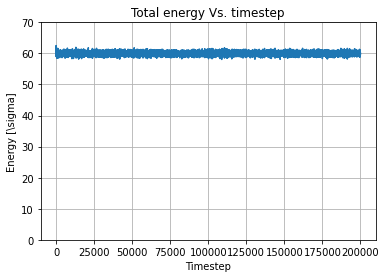

In [16]:
rho = 1.1
N = 30
dt = 1e-3 

gas = md.Ensemble(N=N, rho=rho, dt=dt, seed=0)
gas.relaxate()
gas.random_velocities(kinetic_energy=100., seed=0)
print(f"Initial total energy: {gas.total_energy()}")
steps = 200000

total_energy = np.zeros(steps)

for i in range(steps):
    gas.step()
    total_energy[i] = gas.total_energy()

plt.plot(total_energy)
plt.title("Total energy Vs. timestep")
plt.xlabel("Timestep")
plt.ylabel("Energy [\sigma]")
plt.ylim([0, 70])
plt.grid()
plt.show()